In [ ]:
    
    #initial imports
    import os
    import random
    import numpy as np
    import pandas as pd
    import json
    import keras
    from keras.models import Sequential
    from keras.utils import to_categorical
    from keras.preprocessing import image
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from tqdm import tqdm
    import keras
    from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
    from keras.layers.normalization import BatchNormalization
    import numpy as np
    %matplotlib inline

In [3]:
def prepare():
    ######################################################################################################
    #####################################################################################################
    #getting data ready
    #create a dataframe containing the names of all of the jpgs in the full dataset
    fileList = []
    for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
        if file.endswith(".jpg"):
            fileList.append(file)

    df = pd.DataFrame(fileList)

    #also creating an index to use later in extracting the img labels from the json files
    index = df.index

    #formatting the dataframe
    df = df.rename(columns={0: "Id"}) 
    df['labels'] = df.Id
    df['labels'] = df['labels'].str.replace('.jpg','')
    df['tower_wooden'] = ""
    df['tower_lattice'] = ""
    df['tower_tucohy'] = ""
    index = df.index
     ######################################################################################################
    #####################################################################################################
    for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
        if file.endswith(".json"):

            #load file as json object
            filePath = ("C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/"+file)
            f = open(filePath,)
            json_file = json.load(f)
            #get file namme without extension
            file2 = file.replace('.json','')

            #find designated jpeg (row in df)
            #rslt_df = df.loc[df['labels'] == file2]
            apples_indices = index[df['labels'] == file2]

            #parse json file to see if tower_wooden, tower_lattice, or tower_tucohy exists
            #add 0 or 1 to the corresponding dataframe row accordingly

            for element in json_file['shapes']:

                #tower wooden
                bool_wood = any(sd['label']=='tower_wooden' for sd in json_file['shapes'])  
                if bool_wood:
                    df.at[apples_indices,'tower_wooden']= 1
                else:
                    df.at[apples_indices,'tower_wooden']= 0 

                #tower lattice
                bool_lat = any(sd['label']=='tower_lattice' for sd in json_file['shapes']) 
                if bool_lat:
                    df.at[apples_indices,'tower_lattice']= 1
                else:
                    df.at[apples_indices,'tower_lattice']= 0

                #tower tucohy
                bool_tuc = any(sd['label']=='tower_tucohy' for sd in json_file['shapes']) 
                if bool_tuc:
                    df.at[apples_indices,'tower_tucohy']= 1
                else:
                    df.at[apples_indices,'tower_tucohy']= 0
   ######################################################################################################
    #####################################################################################################                  df.at[apples_indices,'tower_tucohy']= 0

    #create column containing info for all of the towers
    df['towers'] = df[['tower_wooden', 'tower_lattice','tower_tucohy']].values.tolist()
    df['tower_labels'] = np.empty((len(df), 0)).tolist()
    for i in range(len(df)):

        if df['towers'][i][0] == 1:
            df['tower_labels'][i].append("tower_wooden")

        if df['towers'][i][1] == 1:
            df['tower_labels'][i].append("tower_lattice")

        if df['towers'][i][2] == 1:
            df['tower_labels'][i].append("tower_tucohy")
      ######################################################################################################
    #####################################################################################################        
   #need to split the data into testing, training, and validating
    random.seed(123)
    train, validate, test = \
                  np.split(df.sample(frac=1, random_state=42), 
                           [int(.6*len(df)), int(.8*len(df))])    
    #reading in all of the training images
    train_image = []
    for i in tqdm(range(train.shape[0])):
        img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+train.iloc[i][0],target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    X = np.array(train_image)
    #reading in all of the validation images
    valid_image = []
    for i in tqdm(range(validate.shape[0])):
        img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+validate.iloc[i][0],target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        valid_image.append(img)
    X_valid = np.array(valid_image)
    #reading in all of the test images
    test_image = []
    for i in tqdm(range(test.shape[0])):
        img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/'+test.iloc[i][0],target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)
    X_test = np.array(test_image)
    #need to df['DataFrame Column'] = df['DataFrame Column'].astype(float)first convert the column values from strings to floats
    df['tower_wooden'] = df['tower_wooden'].astype(int)
    df['tower_lattice'] = df['tower_lattice'].astype(int)
    df['tower_tucohy'] = df['tower_tucohy'].astype(int)
    y = np.array(train.drop(['Id', 'labels','towers','tower_labels'],axis=1))
    
    #validation set y
    y_validate = np.array(validate.drop(['Id', 'labels','towers','tower_labels'],axis=1))
    #test set y
    y_test = np.array(test.drop(['Id', 'labels','towers','tower_labels'],axis=1))
    
    
    X_train=np.asarray(X).astype(np.int)
    y_train=np.asarray(y).astype(np.int)
    X_valid=np.asarray(X_valid).astype(np.int)
    y_valid=np.asarray(y_validate).astype(np.int)
    X_test=np.asarray(X_test).astype(np.int)
    y_test=np.asarray(y_test).astype(np.int)
    
    #special =  image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data/'+train.iloc[0][0], target_size=(224, 224))
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
######################################################################################################
#####################################################################################################
#getting data ready
#create a dataframe containing the names of all of the jpgs in the full dataset
fileList = []
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
    if file.endswith(".jpg"):
        fileList.append(file)

df = pd.DataFrame(fileList)

#also creating an index to use later in extracting the img labels from the json files
index = df.index

#formatting the dataframe
df = df.rename(columns={0: "Id"}) 
df['labels'] = df.Id
df['labels'] = df['labels'].str.replace('.jpg','')
df['tower_wooden'] = ""
df['tower_lattice'] = ""
df['tower_tucohy'] = ""
index = df.index
 ######################################################################################################
#####################################################################################################
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy'):
    if file.endswith(".json"):

        #load file as json object
        filePath = ("C:/Users/miapi/Downloads/ttpla_dataset/sized_data - Copy/"+file)
        f = open(filePath,)
        json_file = json.load(f)
        #get file namme without extension
        file2 = file.replace('.json','')

        #find designated jpeg (row in df)
        #rslt_df = df.loc[df['labels'] == file2]
        apples_indices = index[df['labels'] == file2]

        #parse json file to see if tower_wooden, tower_lattice, or tower_tucohy exists
        #add 0 or 1 to the corresponding dataframe row accordingly

        for element in json_file['shapes']:

            #tower wooden
            bool_wood = any(sd['label']=='tower_wooden' for sd in json_file['shapes'])  
            if bool_wood:
                df.at[apples_indices,'tower_wooden']= 1
            else:
                df.at[apples_indices,'tower_wooden']= 0 

            #tower lattice
            bool_lat = any(sd['label']=='tower_lattice' for sd in json_file['shapes']) 
            if bool_lat:
                df.at[apples_indices,'tower_lattice']= 1
            else:
                df.at[apples_indices,'tower_lattice']= 0

            #tower tucohy
            bool_tuc = any(sd['label']=='tower_tucohy' for sd in json_file['shapes']) 
            if bool_tuc:
                df.at[apples_indices,'tower_tucohy']= 1
            else:
                df.at[apples_indices,'tower_tucohy']= 0
######################################################################################################
#####################################################################################################                  df.at[apples_indices,'tower_tucohy']= 0

#create column containing info for all of the towers
df['towers'] = df[['tower_wooden', 'tower_lattice','tower_tucohy']].values.tolist()
df['tower_labels'] = np.empty((len(df), 0)).tolist()
for i in range(len(df)):

    if df['towers'][i][0] == 1:
        df['tower_labels'][i].append("tower_wooden")

    if df['towers'][i][1] == 1:
        df['tower_labels'][i].append("tower_lattice")

    if df['towers'][i][2] == 1:
        df['tower_labels'][i].append("tower_tucohy")
  ######################################################################################################
#####################################################################################################        
#need to split the data into testing, training, and validating
random.seed(123)
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])    



In [ ]:
    #reading in all of the training images
    train_image = []
    for i in tqdm(range(train.shape[0])):
        img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data/'+train.iloc[i][0],target_size=(700,700,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    X = np.array(train_image)

In [ ]:
    #reading in all of the validation images
    valid_image = []
    for i in tqdm(range(validate.shape[0])):
        img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data/'+validate.iloc[i][0],target_size=(700,700,3))
        img = image.img_to_array(img)
        img = img/255
        valid_image.append(img)
    X_valid = np.array(valid_image)

In [4]:
X_train, y_train, X_valid, y_valid, X_test, y_test = prepare()

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:05<00:00, 41.86it/s]


In [7]:

model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=5, strides=2, activation='relu', input_shape=(400, 400, 3)))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))       

model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10


ValueError: in user code:

    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:174 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 196, 196, 8) vs (None, 3))


In [9]:
#model architecture
#modify by changing the number of hidden layers, activation functions and other hyperparameters
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [10]:
#can use other optimizers/losses
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=64)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(400,400,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='sigmoid'))
# compile model
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
train_it = datagen.flow(X_train, y_train, batch_size=64)
test_it = datagen.flow(X_valid, y_valid, batch_size=64)

In [15]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)

C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


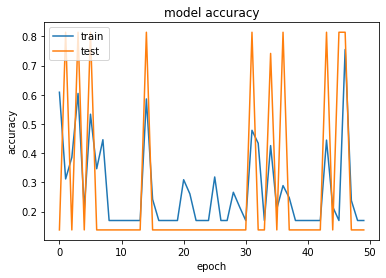

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

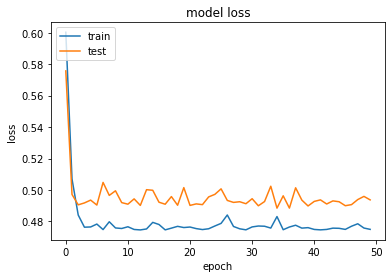

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
results = model.evaluate(X_test, y_test, batch_size=64, verbose = 1)


4/4 [==============================] - 35s 8s/step - loss: 0.5170 - accuracy: 0.2249


In [22]:
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

predictions shape: (3, 3)


In [24]:
predictions

array([[0.05071241, 0.06939304, 0.02207276],
       [0.21190211, 0.22664538, 0.14699122],
       [0.21259308, 0.22911504, 0.15860069]], dtype=float32)

In [25]:
y_test[:3]

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [26]:
predictions = model.predict(X_test)

In [27]:
pred_df = pd.DataFrame(predictions)

In [32]:
pred_df['newcol'] = y_test.tolist()


In [34]:
pred_df.to_csv('cs254proj_predictions.csv')

In [38]:
from numpy import zeros
from numpy import ones
from numpy import asarray
# make all one predictions
train_yhat = asarray([ones(y_train.shape[1]) for _ in range(y_train.shape[0])])
test_yhat = asarray([ones(y_test.shape[1]) for _ in range(y_test.shape[0])])

In [40]:
from sklearn.metrics import fbeta_score
# evaluate predictions
train_score = fbeta_score(y_train, train_yhat, 2, average='samples')
test_score = fbeta_score(y_test, test_yhat, 2, average='samples')
print('All Ones: train=%.3f, test=%.3f' % (train_score, test_score))

All Ones: train=0.340, test=0.367


C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [41]:
from keras import backend
 
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 2
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score

In [42]:
# evaluate predictions with keras
train_score = fbeta(backend.variable(y_train), backend.variable(train_yhat))
test_score = fbeta(backend.variable(y_test), backend.variable(test_yhat))
print('All Ones (keras): train=%.3f, test=%.3f' % (train_score, test_score))

All Ones (keras): train=0.340, test=0.367


In [43]:
test_pred_it = datagen.flow(X_test, y_test, batch_size=64)

In [44]:
# evaluate model
loss, fbeta = model.evaluate_generator(test_pred_it, steps=len(test_pred_it), verbose=1)
print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))

C:\Users\miapi\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


4/4 [==============================] - 39s 9s/step - loss: 0.5057 - accuracy: 0.2008
> loss=0.506, fbeta=0.201


In [47]:
from matplotlib import pyplot
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Fbeta')
	pyplot.plot(history.history['fbeta'], color='blue', label='train')
	pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

KeyError: 'fbeta'

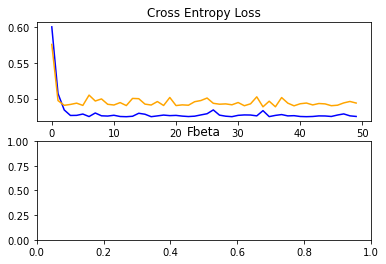

In [48]:
summarize_diagnostics(history) #this is because I trained the model with accuracy metric, not fbeta